# Software, Development, Programming, and Algorithms Part 2 (Data Analytics) 
## Global Covid-19 Cases By Country

In [ ]:
import requests ## Import pandas data libary and requests to pull the global covid-19 data from the webpage url
import pandas as pd


# Data (Covid-19 API)
### Summary
The data used is covid-19 data extracted from a covid-19 API endpoint. The data extratcted from this API is sourced from John Hopkins University Center for Systems Science and Engineering. This API contains data sourced from World Health Organisation, European Centre for Disease Prevention and Control (ECDC) and covid tracking project. The reason why this data is of particular interest is becaus it contains data on the latest global covid-19 cases accross 197 global countries. The variables of interest are the new confirmed, total confirmed, new deaths, and total deaths cases for 197 global countrys throughout the world. Moreover, the reason for this analysis is to analyse covid-19 case data accross 197 different countrys. Through the analysis of this data, it can be explored which countrys have the most and least significant new deaths, total deaths, new confirmed cases, and total confirmed cases. In addition, analysis of this data can help to identify what is causing new death cases. For example through the use of ols regression model analysis, it can be used to identify if there is any statistical significance between new deaths, total confirmed cases, total deaths and new confirmed cases. This can be determined through the results of hypothesis testing and analysis the regression coefficients if significant at the 5% significance levels. Furthermore, this data will allow for analysis that can identify if geogrphic location has any effect on covid-19 cases. 

In [137]:
url = "https://api.covid19api.com/summary" # Create a variable named url to our target webpage url

In [138]:
r = requests.get(url) # Using the requests package imported , this is to make a GET request from the API endpoint.
# Set the request equal to the variable r

In [139]:
r #Print r to see what has been stoed in r. If the  response code is 200, the request has succeeded

<Response [200]>

In [140]:
json = r.json() # Using the json method, extract the  structured data from the request. 

In [141]:
json # Print the json variable in order to view the structured data from the request. 

{'ID': '987ecfb5-1c60-4893-9332-eaa80e152603',
 'Message': '',
 'Global': {'NewConfirmed': 722617,
  'TotalConfirmed': 660600146,
  'NewDeaths': 4273,
  'TotalDeaths': 6696336,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-01-06T14:07:13.904Z'},
 'Countries': [{'ID': '2e761a13-8d76-4557-b9d4-70a0b41fe8e6',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 33,
   'TotalConfirmed': 207748,
   'NewDeaths': 0,
   'TotalDeaths': 7850,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2023-01-06T14:07:13.904Z',
   'Premium': {}},
  {'ID': 'd2a90c1c-8f84-4d27-ba70-8c30567fad50',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 32,
   'TotalConfirmed': 333850,
   'NewDeaths': 0,
   'TotalDeaths': 3596,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2023-01-06T14:07:13.904Z',
   'Premium': {}},
  {'ID': '49165b22-048a-41d2-bcc4-6285ffa577fe',
   'Country': 'Algeria',
   'Cou

In [142]:
json.keys() # Using the keys() method to explore the json variable and keys of the dictionary as a list.

dict_keys(['ID', 'Message', 'Global', 'Countries', 'Date'])

In [143]:
covid_df = pd.DataFrame(json['Countries']) #Load the dataset in to a covid-19 dataframe 
                                          

In [144]:
covid_df # Print the data frame to confirm that the dataset has susscfully been loaded in to the data frame
         # There is no missing data to handle
         # There are no outliers or inconsistencies in the data 

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,2e761a13-8d76-4557-b9d4-70a0b41fe8e6,Afghanistan,AF,afghanistan,33,207748,0,7850,0,0,2023-01-06T14:07:13.904Z,{}
1,d2a90c1c-8f84-4d27-ba70-8c30567fad50,Albania,AL,albania,32,333850,0,3596,0,0,2023-01-06T14:07:13.904Z,{}
2,49165b22-048a-41d2-bcc4-6285ffa577fe,Algeria,DZ,algeria,8,271244,0,6881,0,0,2023-01-06T14:07:13.904Z,{}
3,5544e1ad-4bc2-4fe5-8775-56b5639bc70a,Andorra,AD,andorra,30,47781,0,165,0,0,2023-01-06T14:07:13.904Z,{}
4,4e051387-2f62-458b-bc7d-dcda866fa5e0,Angola,AO,angola,0,105095,0,1930,0,0,2023-01-06T14:07:13.904Z,{}
5,114c49d8-1ace-4a9d-8121-5691a4ec23a3,Antarctica,AQ,antarctica,0,11,0,0,0,0,2023-01-06T14:07:13.904Z,{}
6,970418fb-ca4e-48fa-83ed-b6be9ced6948,Antigua and Barbuda,AG,antigua-and-barbuda,0,9106,0,146,0,0,2023-01-06T14:07:13.904Z,{}
7,33806d37-54e3-4b2f-981f-610228767f72,Argentina,AR,argentina,0,9963697,0,130171,0,0,2023-01-06T14:07:13.904Z,{}
8,0f5c9c05-0b6f-4f22-97d1-4567f1401009,Armenia,AM,armenia,0,445976,0,8716,0,0,2023-01-06T14:07:13.904Z,{}
9,348e332c-58d6-4fd2-8277-d580b0301465,Australia,AU,australia,53837,11190571,173,17285,0,0,2023-01-06T14:07:13.904Z,{}


In [145]:
order = ['Date','Country','NewConfirmed','TotalConfirmed','NewDeaths','TotalDeaths','NewRecovered','TotalRecovered']
covid_df = covid_df[order] # Reorder dataframe by creating a list
                           # This is to remove ID, Country Code, Slug, Date and Premium columns 
                           # which are not necessary for the purpose of this analysis.

In [146]:
json = (json['Country'])

KeyError: 'Country'

In [147]:
pd.set_option("display.max_rows",197) # Change default settings to display all rows in the data frame
covid_df

,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
0,2023-01-06T14:07:13.904Z,Afghanistan,33,207748,0,7850,0,0
1,2023-01-06T14:07:13.904Z,Albania,32,333850,0,3596,0,0
2,2023-01-06T14:07:13.904Z,Algeria,8,271244,0,6881,0,0
3,2023-01-06T14:07:13.904Z,Andorra,30,47781,0,165,0,0
4,2023-01-06T14:07:13.904Z,Angola,0,105095,0,1930,0,0
5,2023-01-06T14:07:13.904Z,Antarctica,0,11,0,0,0,0
6,2023-01-06T14:07:13.904Z,Antigua and Barbuda,0,9106,0,146,0,0
7,2023-01-06T14:07:13.904Z,Argentina,0,9963697,0,130171,0,0
8,2023-01-06T14:07:13.904Z,Armenia,0,445976,0,8716,0,0
9,2023-01-06T14:07:13.904Z,Australia,53837,11190571,173,17285,0,0


# New Confirmed Cases (Descending Order)

In [170]:
covid_df.sort_values(by = ['NewConfirmed'], #Set to false in order to sort the data frame by New Confirmed cases in descending order
                      axis = 0,
                      ascending=False)




,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
85,2023-01-06T14:07:13.904Z,Japan,226904,29820977,334,58504,0,0
188,2023-01-06T14:07:13.904Z,United States of America,128402,101172434,805,1096145,0,0
187,2023-01-06T14:07:13.904Z,United Kingdom,75534,24441793,720,214718,0,0
91,2023-01-06T14:07:13.904Z,Korea (South),56954,29420226,75,32496,0,0
9,2023-01-06T14:07:13.904Z,Australia,53837,11190571,173,17285,0,0
173,2023-01-06T14:07:13.904Z,"Taiwan, Republic of China",31498,8979699,45,15383,0,0
64,2023-01-06T14:07:13.904Z,Germany,20922,37496370,262,162518,0,0
36,2023-01-06T14:07:13.904Z,China,18422,3109929,68,17404,0,0
17,2023-01-06T14:07:13.904Z,Belgium,13986,4682234,167,33395,0,0
60,2023-01-06T14:07:13.904Z,France,11672,39586288,143,163684,0,0


# Analysis
The top 5 countries with the highest new cofirmed covid-19 cases includes Japan, USA, Germany, South Korea, and Australlia,
Japan saw the highest rate of New Confirmed covid-19 cases at a total of 192,063, 
the second largest was the US at a value of 100,470, Germany was third at 73,539
South Korea New confirmed cases is 65,207 , and in fifth place is Australlia at 39,695.

 # Total Confirmed cases (Descending Order)

In [149]:
covid_df.sort_values(by = ['TotalConfirmed'], #Set to false in order to sort the data frame by Total Confirmed cases in descending order
                      axis = 0,
                      ascending=False)



,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
188,2023-01-06T14:07:13.904Z,United States of America,128402,101172434,805,1096145,0,0
77,2023-01-06T14:07:13.904Z,India,228,44680771,4,530714,0,0
60,2023-01-06T14:07:13.904Z,France,11672,39586288,143,163684,0,0
64,2023-01-06T14:07:13.904Z,Germany,20922,37496370,262,162518,0,0
24,2023-01-06T14:07:13.904Z,Brazil,0,36423138,0,694411,0,0
85,2023-01-06T14:07:13.904Z,Japan,226904,29820977,334,58504,0,0
91,2023-01-06T14:07:13.904Z,Korea (South),56954,29420226,75,32496,0,0
83,2023-01-06T14:07:13.904Z,Italy,0,25143705,0,184642,0,0
187,2023-01-06T14:07:13.904Z,United Kingdom,75534,24441793,720,214718,0,0
145,2023-01-06T14:07:13.904Z,Russian Federation,3241,21508942,46,386017,0,0


# Analysis Top 5 Countrys (New Confirmed Cases) 
 The total confirmed Cases US, India, France, Germany and Brazil saw the greatest sum of total confirmed cases accross all countrys
US saw 100,706,571 total cases, India was less than half the US at 44,679,382, France is 39,474,380 cases
Germany saw a total of 37,345,969 cases, and Brazil is 36,302,415

# New Deaths (Descending Order)

In [150]:
covid_df.sort_values(by = ['NewDeaths'], #Set to false in order to sort the data frame by Total Confirmed cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
188,2023-01-06T14:07:13.904Z,United States of America,128402,101172434,805,1096145,0,0
187,2023-01-06T14:07:13.904Z,United Kingdom,75534,24441793,720,214718,0,0
85,2023-01-06T14:07:13.904Z,Japan,226904,29820977,334,58504,0,0
59,2023-01-06T14:07:13.904Z,Finland,8192,1446397,330,8263,0,0
165,2023-01-06T14:07:13.904Z,Spain,9220,13693478,318,117413,0,0
170,2023-01-06T14:07:13.904Z,Sweden,8494,2683356,315,22142,0,0
64,2023-01-06T14:07:13.904Z,Germany,20922,37496370,262,162518,0,0
31,2023-01-06T14:07:13.904Z,Canada,11357,3897836,194,44090,0,0
9,2023-01-06T14:07:13.904Z,Australia,53837,11190571,173,17285,0,0
17,2023-01-06T14:07:13.904Z,Belgium,13986,4682234,167,33395,0,0


# Analysis Top 5 Countrys (New Deaths Cases)

The top 5 countrys which has the greatest sum of new deaths is the US, Japan, Germany, Sweden, and Brazil.The US is a total of 894 deaths , Japan hs less than half US at 420, Germany is 349
Sweden is 200, and Brazil is 172

# Total Deaths (Descending Order)

In [151]:
covid_df.sort_values(by = ['TotalDeaths'], ## Sort values only in the New Deaths cases column
#Set to false in order to sort the data frame by Total Confirmed cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
188,2023-01-06T14:07:13.904Z,United States of America,128402,101172434,805,1096145,0,0
24,2023-01-06T14:07:13.904Z,Brazil,0,36423138,0,694411,0,0
77,2023-01-06T14:07:13.904Z,India,228,44680771,4,530714,0,0
145,2023-01-06T14:07:13.904Z,Russian Federation,3241,21508942,46,386017,0,0
113,2023-01-06T14:07:13.904Z,Mexico,0,7257916,0,331206,0,0
138,2023-01-06T14:07:13.904Z,Peru,0,4460100,0,218304,0,0
187,2023-01-06T14:07:13.904Z,United Kingdom,75534,24441793,720,214718,0,0
83,2023-01-06T14:07:13.904Z,Italy,0,25143705,0,184642,0,0
60,2023-01-06T14:07:13.904Z,France,11672,39586288,143,163684,0,0
64,2023-01-06T14:07:13.904Z,Germany,20922,37496370,262,162518,0,0


# Analysis Top 5 Countrys (Total Deaths)
US, Brazil, India, Russia and Mexico have the highest total deaths out of all countrys.
US has a total of 1,092,456 million, Brazil is 693,734, India is 530,699 
Russia is 385,682 and Mexico is 331,105 Total Deaths
Antartica, tuvalu and Holy See (Vatican City State) has zero reported covid-19 deaths. 
 However, they saw the least amount of total confirmed cases. Antartica had 11, Tuvalu has 2805 and Holy See (Vatican City State) has just 29

# Summary Statistics of covid-19 data 

In [152]:
covid_df.sum() # Computes Sum of all countries covid19 data 

Date              2023-01-06T14:07:13.904Z2023-01-06T14:07:13.90...
Country           AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
NewConfirmed                                                 722617
TotalConfirmed                                            660600146
NewDeaths                                                      4273
TotalDeaths                                                 6696336
NewRecovered                                                      0
TotalRecovered                                                    0
dtype: object

# Analysis Summary Statistics
Total new confirmed cases accross all countrys totals 662,049 thousand
Sum of total confirmed cases accross all countrys totals 657,311,909 million
Sum of new deaths accross all countrys totals 2,768
sum of total deaths accross all countries 6,681,151 million

In [153]:
covid_df.info() # Produces information on the data type in each column of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            197 non-null    object
 1   Country         197 non-null    object
 2   NewConfirmed    197 non-null    int64 
 3   TotalConfirmed  197 non-null    int64 
 4   NewDeaths       197 non-null    int64 
 5   TotalDeaths     197 non-null    int64 
 6   NewRecovered    197 non-null    int64 
 7   TotalRecovered  197 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 12.4+ KB


In [154]:
maxValues = covid_df['Country'].max()

In [155]:
covid_df[:5]

,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
0,2023-01-06T14:07:13.904Z,Afghanistan,33,207748,0,7850,0,0
1,2023-01-06T14:07:13.904Z,Albania,32,333850,0,3596,0,0
2,2023-01-06T14:07:13.904Z,Algeria,8,271244,0,6881,0,0
3,2023-01-06T14:07:13.904Z,Andorra,30,47781,0,165,0,0
4,2023-01-06T14:07:13.904Z,Angola,0,105095,0,1930,0,0


# Descriptive Statistics

In [156]:
covid_df.describe() #Produces descriptive statistics table for the covid-19 data in the dataframe


,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,197.000000,1.970000e+02,197.000000,1.970000e+02,197.0,197.0
mean,3668.106599,3.353300e+06,21.690355,3.399155e+04,0.0,0.0
std,20173.743199,9.967204e+06,93.220829,1.099837e+05,0.0,0.0
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.0,0.0
25%,0.000000,4.235100e+04,0.000000,4.090000e+02,0.0,0.0
50%,0.000000,3.338500e+05,0.000000,3.464000e+03,0.0,0.0
75%,101.000000,1.746997e+06,1.000000,1.765200e+04,0.0,0.0
max,226904.000000,1.011724e+08,805.000000,1.096145e+06,0.0,0.0


# Analysis (Descriptive Statistics)
The descriptive statistics is extracted from all 197 global countrys in the covid_df data frame. The mean of new confirmed cases accross all countrys is 3,668, the mean of total confirmed cases is 3,353,300, new death cases had a mean of 21 deaths, and total death cases has a mean of 33,991. This means that covid-19 is continuing to spread , and grow in numbers accross the world. 

# Correlation Matrix 

In [157]:
## Create a correlation matrix from the dataframe 
## Identify the pairwise correlation of all columns in covid_df dataframe
## Create a variable equal to the correlation matrix of the covid 19 dataframe
covid_dfmatrix = covid_df.corr() 
covid_dfmatrix

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
NewConfirmed,1.000000,0.597959,0.691941,0.368423,NaN,NaN
TotalConfirmed,0.597959,1.000000,0.683152,0.876037,NaN,NaN
NewDeaths,0.691941,0.683152,1.000000,0.540044,NaN,NaN
TotalDeaths,0.368423,0.876037,0.540044,1.000000,NaN,NaN
NewRecovered,NaN,NaN,NaN,NaN,NaN,NaN
TotalRecovered,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
import seaborn as sns #Import seaborn package
import matplotlib.pyplot as plt #Import Matplot package

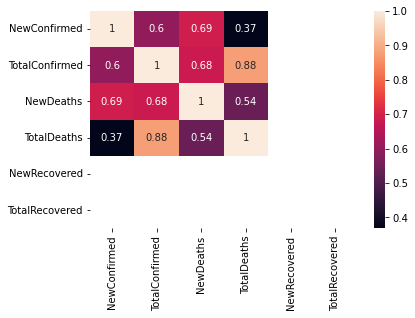

In [159]:
# Create a visual representation heatmap of the correlation matrix using matplot and seaborn
sns.heatmap(covid_dfmatrix, annot=True)
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

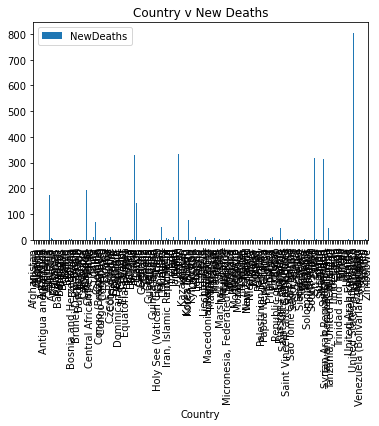

In [160]:
covid_df.plot.bar(x='Country', y='NewDeaths', rot=50, title = 'Country v New Deaths');
plt.xticks(rotation=90)

# Analysis (Country v New Deaths)
As illustraed in the country v new deaths bar chart. New deaths remain stable accross the majority of the 197 countrys. However, there are an array of peaks associated with various geographical locations. United States of America is the highest amongst all 197 countrys. 

In [161]:
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib

<AxesSubplot:>

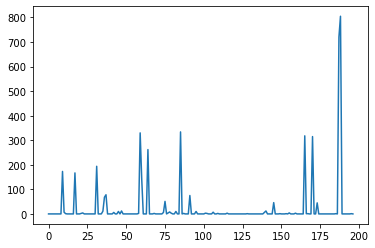

In [162]:
covid_df['NewDeaths'].plot()

<AxesSubplot:>

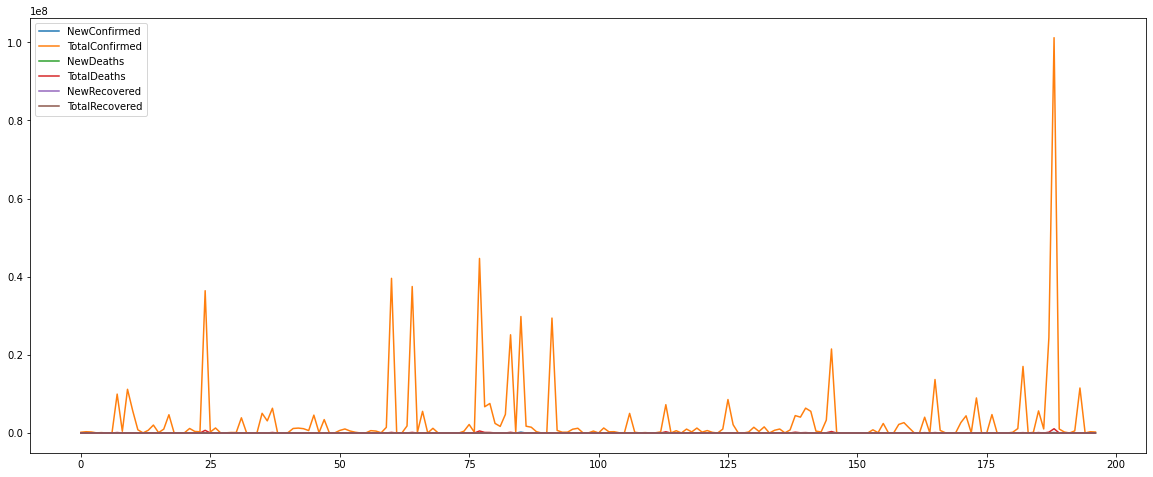

In [163]:
covid_df.plot(figsize=(20,8))

In [164]:
import statsmodels.formula.api as smf

# Question 1
## What is covid-19 deaths influenced by ?
### Are covid-19 deaths likely influenced by 'new confirmed', 'total confirmed' or 'total deaths' and is there any statistical significance at the 5% significance levels?


In [172]:
reg1 = 'NewDeaths~NewConfirmed+TotalConfirmed+TotalDeaths' # OLS multiple regression model 
reg1output=smf.ols(reg1,covid_df).fit()
print(reg1output.summary())


                            OLS Regression Results                            
Dep. Variable:              NewDeaths   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     93.45
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           2.16e-37
Time:                        21:20:46   Log-Likelihood:                -1084.0
No. Observations:                 197   AIC:                             2176.
Df Residuals:                     193   BIC:                             2189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0138      4.512      0.

# Analysis 
## Hypothesis Test 
### A hypothesis test is implemented to determine if any of the independent variables have any statistically significant impact on the dependent variable. If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and confirm there is no statistically significant impact of that independent variable on the dependent variable in the OLS regression model.

### Alternative Hypothesis (H1) = There is a correlation between the inpendent variable and the dependent variable
### Null Hypothesis (H0)= There is no correlation  between the independent variables and the dependant variable

h1 = p-value ≤ 0.05
h0 = p-value ≥ 0.05

## Hypothesis test (New Confirmed Cases)

p-value = 0.900, which is larger than 0.05. Therfore, we fail to reject the null hypotheiss and conclude that new confirmed cases had no statistically significany impact on New deaths. This means that it is unlikely new confirmed cases of covid-19 resulted in new deaths. 

## Hypothesis Test (Total Confirmed Cases)
The p-value for the independent variable total confirmed cases is less than 0.05 at 0.000. Therefore, we reject the null hypothesis and conclude that total confirmed cases had a statistically significant impact on the dependent variable new deaths. This means that total confirmed covid-19 cases is negatively related to new covid-19 related deaths. For every increase of 1% total confirmed cases of covid-19, New deaths decreases by -0.0052%.

## Hypothesis Test (Total Deaths)

The p-value for the independent variable total deaths is less than 0.05 at 0.000. Therefore, we reject the null hypothesis and conclude that total deaths has a statistically significant impact on New Deaths. The beta coffiecient for total deaths is positive at 0.5467. This means that for every 1% increase in total deaths, new deaths increases by 0.5467. 

Since the r-squared value is approximtely 0.5. This means that only 50% of the variation in new confirmed cases, total confirmed cases, and total deaths explain the variation in new deaths. Total confirmed cases and total deaths are statistically significant st the 5% significance level. However, it is likely that the OLS regression model suffers from ommitted variable bias, there are other factors not included in the regression model that have a statsitically significant impact on the dependent vairable new deaths. 

# Question 2
## What are the chances of a new covid-19 case surviving ?
### How likely is a new confirmed case of covid-19 to survive?


In [173]:
covid_df.sum() # A statistical summation of the values in the covid 19 dataframe

Date              2023-01-06T14:07:13.904Z2023-01-06T14:07:13.90...
Country           AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...
NewConfirmed                                                 722617
TotalConfirmed                                            660600146
NewDeaths                                                      4273
TotalDeaths                                                 6696336
NewRecovered                                                      0
TotalRecovered                                                    0
dtype: object

# Question 2 Analysis
This summary was produced in order to capture the total value of each global case type. These figures are then used to produce a survival rate calculation in order to determine the survival rate of new confirmed cases.
Compute New covid-19 deaths divided by New confirmed covid 19 cases
# Calculation
New deaths/New Confirmed = covid-19 death rate
4273/722,617 = 0.00591 death rate
1-0.00591= 99.4% approximte survival rate in global covid-19 cases. This means that out of 722,617 new confirmed covid-19 cases.
722,617 * 99.4% = 718,281 survived, whilst 4,336 did not survive. 


# Question 3
## Does geographic location effect covid-19 cases?
### Which Country saw the greatest new death and new confirmed cases for covid-19?

In [175]:
plt.figure(figsize=(20, 6))
plt.plot(covid_df.loc[:, "Country"], covid_df.loc[:,'NewDeaths'] title = 'Country v New Deaths');
plt.xticks(rotation=90) # Rotate the x-axis labels 

SyntaxError: invalid syntax (3362001063.py, line 2)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

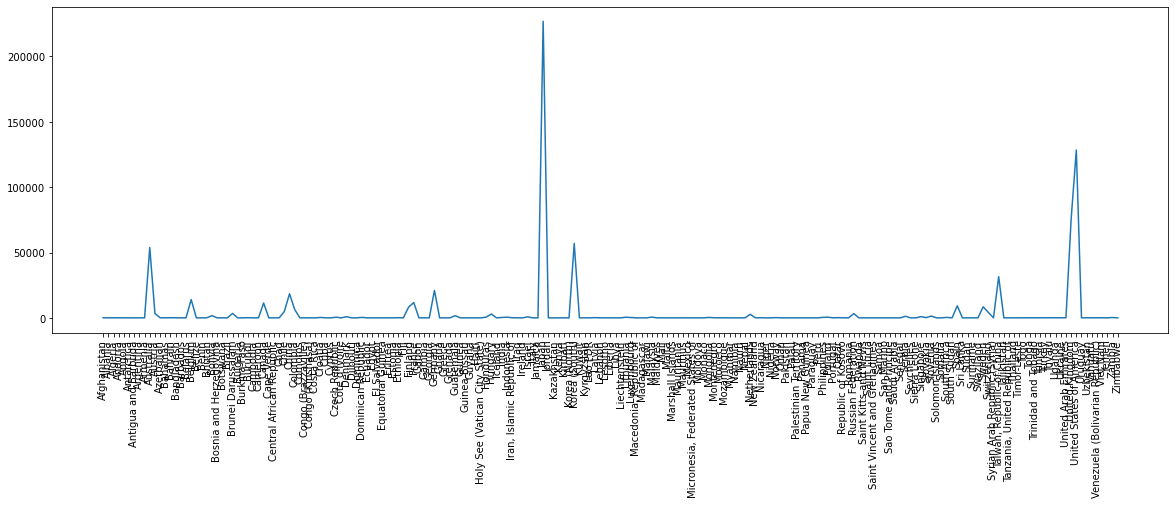

In [178]:
plt.figure(figsize=(20, 6))
plt.plot(covid_df.loc[:, "Country"], covid_df.loc[:,'NewConfirmed']);
plt.xticks(rotation=90) # Rotate the x-axis labels 

In [169]:
covid_df.sort_values(by = ['NewDeaths'], # Sorts new death cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
188,2023-01-06T14:07:13.904Z,United States of America,128402,101172434,805,1096145,0,0
187,2023-01-06T14:07:13.904Z,United Kingdom,75534,24441793,720,214718,0,0
85,2023-01-06T14:07:13.904Z,Japan,226904,29820977,334,58504,0,0
59,2023-01-06T14:07:13.904Z,Finland,8192,1446397,330,8263,0,0
165,2023-01-06T14:07:13.904Z,Spain,9220,13693478,318,117413,0,0
170,2023-01-06T14:07:13.904Z,Sweden,8494,2683356,315,22142,0,0
64,2023-01-06T14:07:13.904Z,Germany,20922,37496370,262,162518,0,0
31,2023-01-06T14:07:13.904Z,Canada,11357,3897836,194,44090,0,0
9,2023-01-06T14:07:13.904Z,Australia,53837,11190571,173,17285,0,0
17,2023-01-06T14:07:13.904Z,Belgium,13986,4682234,167,33395,0,0


In [171]:
covid_df.sort_values(by = ['NewConfirmed'], #Set to false in order to sort the data frame by New Confirmed cases in descending order
                      axis = 0,
                      ascending=False)


,Date,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
85,2023-01-06T14:07:13.904Z,Japan,226904,29820977,334,58504,0,0
188,2023-01-06T14:07:13.904Z,United States of America,128402,101172434,805,1096145,0,0
187,2023-01-06T14:07:13.904Z,United Kingdom,75534,24441793,720,214718,0,0
91,2023-01-06T14:07:13.904Z,Korea (South),56954,29420226,75,32496,0,0
9,2023-01-06T14:07:13.904Z,Australia,53837,11190571,173,17285,0,0
173,2023-01-06T14:07:13.904Z,"Taiwan, Republic of China",31498,8979699,45,15383,0,0
64,2023-01-06T14:07:13.904Z,Germany,20922,37496370,262,162518,0,0
36,2023-01-06T14:07:13.904Z,China,18422,3109929,68,17404,0,0
17,2023-01-06T14:07:13.904Z,Belgium,13986,4682234,167,33395,0,0
60,2023-01-06T14:07:13.904Z,France,11672,39586288,143,163684,0,0


# Question 3 Analysis
The top 5 countries in terms of new death cases are the United States of America at 805, the United Kingdom with 720, Japan at 334, Finland at 330, and Spain which has 318. However, new confirmed cases for Japan at 226,904, the United States of America at 128,402, and the United Kingdom also have 75,534 which is the highest out of all 197 countries. As a result, the data shows that Japan, the United States, and United Kingdom have seen the largest quantity of new confirmed and new death covid-19 cases out of a total of 197 global countries. As a result of this, geographical location does have an impact on new death and new confirmed cases. In addition to that, countries such as Zimbabwe, Greece, Grenada, Guinea, Guinea-Bissau, Holy See (Vatican City State), Iceland, Iraq, Ireland, and Italy have no confirmed new and new deaths cases of covid-19.


# Conclusion

By using an ordinary least squares multiple regression model the findings can be used in order to explore and analyse the variables which covid-19 may be influenced by. The findings from the hypothesis tests and associated p-values revealed that global total confirmed and global new confirmed covid-19 cases both had statistically significant impacts on global new death cases as the p-values was less than 0.05. However, Total deaths had no significant impact on global new deaths. The chances of global new confirmed cases suriving covid-19 are high which approximtely 99.4% of new confirmed cases not resulting in new death cases. However, 4273 did not survive out of the total 722,617 global new confirmed covid-19 cases. New confirmed cases , and new deaths is significnatly higher accross certain geographical locations. In particular as revealed on the first graph of United States of America New death cases are significantly higher compared to that of the other 196 countrys. Moreover, as illustrated in the second graph of question 3 Japan saw the largest peak in new confirmed cases out of all 197 countrys.